In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.ExcelFile("Database-on-education-for-children-with-disabilities_2021.xlsx")
anarPrimary = df.parse(1)
oosPrimary = df.parse(4)
completePrimary = df.parse(7)
readingSkills = df.parse(8)
numeracySkills = df.parse(9)

In [3]:
anarPrimary

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total,Unnamed: 8,Unnamed: 9,Children without functional difficulties,Unnamed: 11,Unnamed: 12,Children with functional difficulties,Unnamed: 14,Unnamed: 15,Data source,Time period,GNI per capita (current US$)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Point estimate,Upper limit,Lower limit,Point estimate,Upper limit,Lower limit,Point estimate,Upper limit,Lower limit,NaN,NaN,NaN
1,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Total,82.7,83.3,82.1,83.7,84.3,83.1,72.1,74.6,69.6,MICS6,2019,2030.0
2,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Male,80.1,81,79.2,81.4,82.3,80.5,68.1,71.5,64.6,MICS6,2019,2030.0
3,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Female,85.3,86.1,84.5,86,86.9,85.2,76.8,80.2,73.3,MICS6,2019,2030.0
4,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Urban,84.3,85.6,82.9,84.9,86.3,83.6,76.1,81.8,70.3,MICS6,2019,2030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Zimbabwe,ZWE,SSA,ESA,Less Developed,ANAR Primary,Total,90.3,91.2,89.3,90.3,91.2,89.3,90.1,93.2,87.1,MICS6,2019,1140.0
157,Zimbabwe,ZWE,SSA,ESA,Less Developed,ANAR Primary,Male,89.2,90.5,87.8,89.2,90.6,87.8,88.6,92.9,84.2,MICS6,2019,1140.0
158,Zimbabwe,ZWE,SSA,ESA,Less Developed,ANAR Primary,Female,91.4,92.7,90.2,91.4,92.7,90.1,92,96.1,87.9,MICS6,2019,1140.0
159,Zimbabwe,ZWE,SSA,ESA,Less Developed,ANAR Primary,Urban,92.8,94.2,91.3,93,94.5,91.5,90.1,96.5,83.8,MICS6,2019,1140.0


In [4]:
anarPrimary['Sub-region'].unique()

array([nan, 'SA', 'EECA', 'WCA', 'LAC', 'MENA', 'EAP', 'ESA'],
      dtype=object)

In [5]:
anarPrimary.dtypes

Countries and areas                          object
ISO Code                                     object
Region                                       object
Sub-region                                   object
Development regions                          object
Indicator                                    object
Category                                     object
Total                                        object
Unnamed: 8                                   object
Unnamed: 9                                   object
Children without functional difficulties     object
Unnamed: 11                                  object
Unnamed: 12                                  object
Children with functional difficulties        object
Unnamed: 14                                  object
Unnamed: 15                                  object
Data source                                  object
Time period                                  object
GNI per capita (current US$)                float64
dtype: objec

In [6]:
#function to clean the file
def cleanFile(name):
    name.rename(columns = {'Total':'Total Point Estimate',
                        'Children without functional difficulties':'Children without functional difficulties Point Estimate',
                        'Children with functional difficulties':'Children with functional difficulties Point Estimate'},
                        inplace = True)

    # drop unnecessary columns
    name.drop(['Unnamed: 8','Unnamed: 9',
            'Unnamed: 11','Unnamed: 12',
            'Unnamed: 14','Unnamed: 15'], axis = 1, inplace = True)

    # drop the first row
    name.drop(labels = 0, axis = 0, inplace = True)


In [7]:
cleanFile(anarPrimary)

In [8]:
anarPrimary.head(5)

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total Point Estimate,Children without functional difficulties Point Estimate,Children with functional difficulties Point Estimate,Data source,Time period,GNI per capita (current US$)
1,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Total,82.7,83.7,72.1,MICS6,2019,2030.0
2,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Male,80.1,81.4,68.1,MICS6,2019,2030.0
3,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Female,85.3,86,76.8,MICS6,2019,2030.0
4,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Urban,84.3,84.9,76.1,MICS6,2019,2030.0
5,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Rural,82.2,83.3,71.2,MICS6,2019,2030.0


In [9]:
anarPrimary.dtypes

Countries and areas                                         object
ISO Code                                                    object
Region                                                      object
Sub-region                                                  object
Development regions                                         object
Indicator                                                   object
Category                                                    object
Total Point Estimate                                        object
Children without functional difficulties Point Estimate     object
Children with functional difficulties Point Estimate        object
Data source                                                 object
Time period                                                 object
GNI per capita (current US$)                               float64
dtype: object

In [10]:
anarPrimary = anarPrimary.astype({'Total Point Estimate':'float','Children without functional difficulties Point Estimate':'float',
    'Children with functional difficulties Point Estimate': 'float'})
anarPrimary.dtypes

Countries and areas                                         object
ISO Code                                                    object
Region                                                      object
Sub-region                                                  object
Development regions                                         object
Indicator                                                   object
Category                                                    object
Total Point Estimate                                       float64
Children without functional difficulties Point Estimate    float64
Children with functional difficulties Point Estimate       float64
Data source                                                 object
Time period                                                 object
GNI per capita (current US$)                               float64
dtype: object

## Question 1
## Descriptive question <br>
Which least developed country has the highest total point estimate average for children without functional difficulties in their foundational reading skills? 

In [11]:
cleanFile(readingSkills)

readingSkills
readingSkills = readingSkills.astype({'Total Point Estimate':'float','Children without functional difficulties Point Estimate':'float',
    'Children with functional difficulties Point Estimate': 'float'})

In [12]:
#readingSkills.drop.columns
t = readingSkills["Countries and areas"].value_counts()
t.shape

(32,)

In [13]:
readingS = readingSkills.copy()
readingS = readingS[readingS["Category"].str.contains("Male") == False]
readingS = readingS[readingS["Category"].str.contains("Female") == False]
readingS = readingS[readingS["Category"].str.contains("Urban") == False]
readingS = readingS[readingS["Category"].str.contains("Rural") == False]
#print(readingS.columns)

#drop more and less developed
readingS = readingS[readingS["Development regions"].str.contains("More Developed") == False]
readingS = readingS[readingS["Development regions"].str.contains("Less Developed") == False]
readingS

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total Point Estimate,Children without functional difficulties Point Estimate,Children with functional difficulties Point Estimate,Data source,Time period,GNI per capita (current US$)
1,Bangladesh,BGD,SA,SA,Least Developed,Foundational reading skill,Total,48.8,50.0,35.7,MICS6,2019,2030.0
11,Central African Republic,CAF,SSA,WCA,Least Developed,Foundational reading skill,Total,4.7,5.3,3.5,MICS6,2018-2019,500.0
16,Chad,TCD,SSA,WCA,Least Developed,Foundational reading skill,Total,4.4,4.4,4.3,MICS6,2019,630.0
21,Democratic Republic of the Congo,COD,SSA,WCA,Least Developed,Foundational reading skill,Total,8.7,9.7,4.8,MICS6,2017-2018,550.0
26,Gambia,GMB,SSA,WCA,Least Developed,Foundational reading skill,Total,12.4,13.1,6.9,MICS6,2018,750.0
36,Guinea-Bissau,GNB,SSA,WCA,Least Developed,Foundational reading skill,Total,12.4,12.8,10.4,MICS6,2018-2019,760.0
51,Kiribati,KIR,EAP,EAP,Least Developed,Foundational reading skill,Total,35.4,35.5,35.0,MICS6,2018-2019,2960.0
66,Lesotho,LSO,SSA,ESA,Least Developed,Foundational reading skill,Total,43.8,44.4,36.3,MICS6,2018,1100.0
71,Madagascar,MDG,SSA,ESA,Least Developed,Foundational reading skill,Total,23.5,23.6,23.0,MICS6,2018,470.0
81,Nepal,NPL,SA,SA,Least Developed,Foundational reading skill,Total,39.2,40.1,33.1,MICS6,2019,1190.0


In [14]:
#readingS["Development regions"].isnull().sum()

readingS = readingS[readingS["Children without functional difficulties Point Estimate"].notna()]
#readingS["Total Point Estimate"].isnull().sum()

#readingS = readingS.groupby(['Countries and areas'])['Total Point Estimate'].max()
readingS = readingS.groupby('Countries and areas')['Children without functional difficulties Point Estimate'].max().reset_index(name ='Children without functional difficulties Point Estimate').sort_values('Children without functional difficulties Point Estimate', ascending=False)
readingS

,Countries and areas,Children without functional difficulties Point Estimate
13,Tuvalu,56.3
0,Bangladesh,50.0
7,Lesotho,44.4
10,Sao Tome and Principe,41.5
9,Nepal,40.1
6,Kiribati,35.5
8,Madagascar,23.6
12,Togo,18.5
11,Sierra Leone,16.6
4,Gambia,13.1


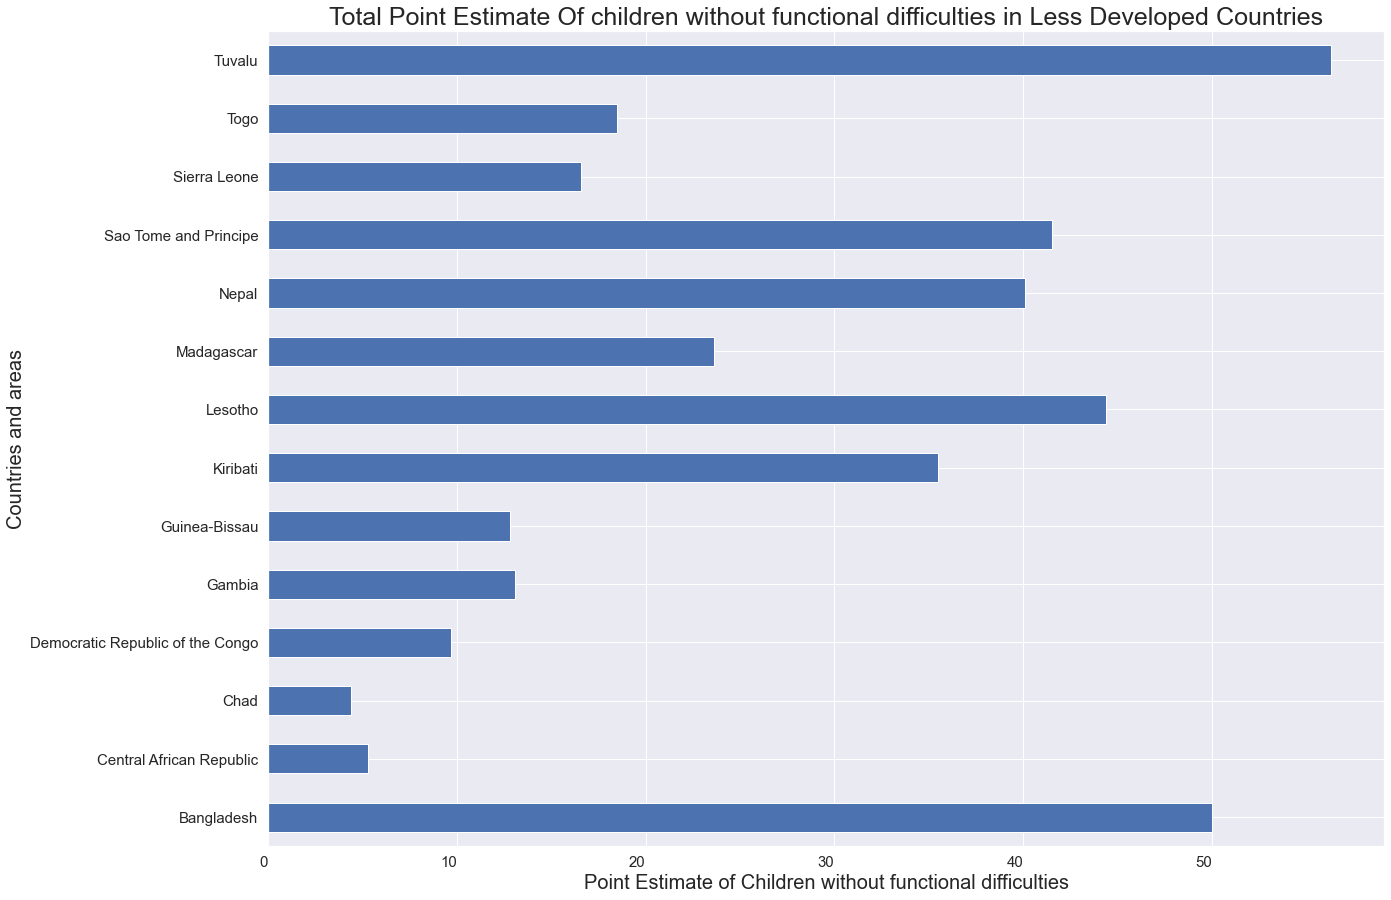

In [15]:
from matplotlib.pyplot import figure
sns.set(rc={'figure.figsize':(20,15)})
readingS.groupby(['Countries and areas'])['Children without functional difficulties Point Estimate'].max().plot(kind='barh')
plt.title('Total Point Estimate Of children without functional difficulties in Less Developed Countries', size=25)
plt.yticks(size = 15) 
plt.xticks(rotation = 0, ha='right', size = 15)
plt.ylabel('Countries and areas', size = 20)
plt.xlabel('Point Estimate of Children without functional difficulties', size = 20)
plt.show()

# From this bar chart, we can see that Turks and Caicos Islands has the highest TPE of children without functional difficulties

## Question 2
## Exploratory  question <br>
What is the relationship of point estimates between children with functional difficulties and children without functional difficulties in ANAR Primary? 



In [16]:
anarPrimary['Children without functional difficulties Point Estimate'].unique()

array([83.7, 81.4, 86. , 84.9, 83.3, 93. , 93.2, 92.9, 91.7, 97.7, 74. ,
       77.6, 70.2, 86.8, 66.8, 45.4, 48.2, 42.7, 67.5, 40.7, 78.1, 79.8,
       76.4, 86.2, 71.8, 80.6, 81.7, 79.7, 70.4, 81.9, 80.1, 83.8, 86.6,
       78.3, 69.5, 71.4, 84.2, 62.1, 97.3, 96.9, 97.5, 97.2, 78.8, 82.7,
       75.1, 81.5, 73.7, 98.2, 98.8, 97.8, 98.5, 96.2, 95.5, 97.1, 93.7,
       95.8, 95.4, 95.2, 96.7, 97.9, 67.4, 62.8, 71.9, 83.1, 63.7, 93.8,
       93.6, 95. , 91. , 75.7, 74.9, 76.6, 76.3, 74.7, 97.4, 98.9, 96.1,
       96.4, 99.3, 96.8, 98.7, 65.7, 66.1, 65.3, 70.8, 63.1, 88.7, 88. ,
       89.5, 87.9, 88.6, 90.3, 91.8, 83.6, 82.4, 84.3, 92.2, 75.5, 36.5,
       38. , 34.9, 48.8, 25.9, 94.5, 94. , 95.1, 92.5, 99.9,  nan, 92.4,
       97. , 90. , 97.6, 94.3, 93.5, 99.1, 98.4, 74.5, 78.2, 70.5, 77.3,
       70.9, 89.2, 91.4, 89.3])

In [17]:
anarPrimary['Children with functional difficulties Point Estimate'].unique()

array([72.1, 68.1, 76.8, 76.1, 71.2, 77.9,  nan, 71.3, 74.1, 68.2, 86.7,
       63.9, 38.3, 39.5, 37.2, 58.2, 34.3, 75.1, 73. , 85.3, 66.8, 79.1,
       77.3, 81.3, 80.8, 80.5, 78.1, 83.3, 85.9, 77. , 63.2, 60.7, 65.8,
       84.4, 50.4, 93.6, 91.9, 95.5, 94.5, 93.2, 72.4, 70.7, 75. , 76.2,
       63.6, 94.8, 96. , 93.5, 96.3, 97.3, 98.4, 98. , 96.5, 95.8, 97.4,
       96.1, 63. , 62.3, 63.7, 60.8, 86.3, 84.7, 87.8, 88.3, 83. , 73.3,
       72.5, 74.2, 71.7, 75.8, 93.8, 92.4, 93. , 91.5, 92.5, 91.7, 61.1,
       62.2, 59.8, 70.3, 56.3, 94.9, 89.1, 84.2, 85.8, 82.5, 85.5, 81.6,
       79.2, 84.1, 89.3, 34.9, 37.4, 32.1, 46.2, 21.2, 89.2, 96.4, 92.7,
       92.1, 94.2, 93.9, 97.5, 92.2, 95.3, 92.6, 90.1, 88.6, 92. ])

In [18]:
anarPrimary.dropna(inplace = True)
anarPrimary.head(5)

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total Point Estimate,Children without functional difficulties Point Estimate,Children with functional difficulties Point Estimate,Data source,Time period,GNI per capita (current US$)
1,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Total,82.7,83.7,72.1,MICS6,2019,2030.0
2,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Male,80.1,81.4,68.1,MICS6,2019,2030.0
3,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Female,85.3,86.0,76.8,MICS6,2019,2030.0
4,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Urban,84.3,84.9,76.1,MICS6,2019,2030.0
5,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Rural,82.2,83.3,71.2,MICS6,2019,2030.0


In [19]:
pearson_coef, p_value = stats.pearsonr(anarPrimary['Children without functional difficulties Point Estimate'], anarPrimary['Children with functional difficulties Point Estimate'])
print("The Pearson Correlation Coefficient is:")
print(pearson_coef)
print()
print("P-value is :")
print(p_value)

# Conclusion: Since the p-value is < 0.001, the correlation between children without functional difficulties point estimate and
# children with functional difficulties point estimate is statistically significant and the coefficient is ~0.973 shows that the
# relationship is positive and moderately strong

The Pearson Correlation Coefficient is:
0.9725283854978899

P-value is :
5.416687832939713e-81


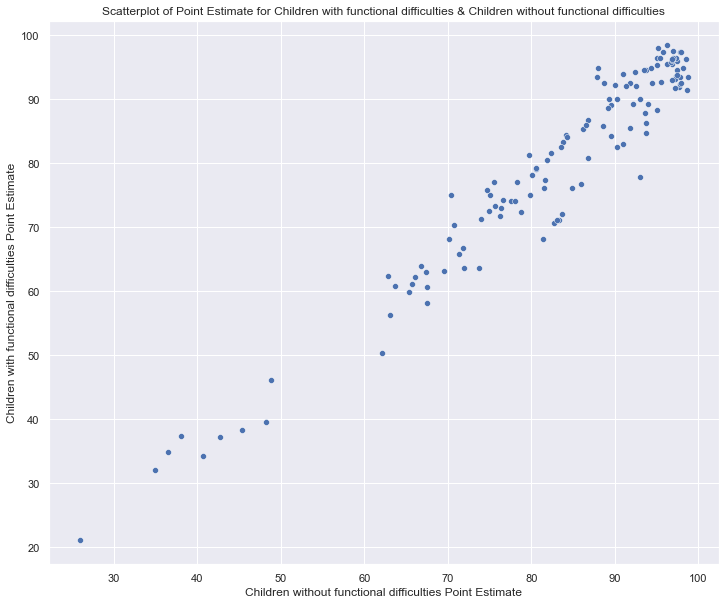

In [20]:
sns.set(rc={'figure.figsize':(12,10)})
sns.scatterplot(data = anarPrimary, x = 'Children without functional difficulties Point Estimate', y = 'Children with functional difficulties Point Estimate').set(title='Scatterplot of Point Estimate for Children with functional difficulties & Children without functional difficulties')
plt.savefig("q2_scatterplot")
plt.show()

## Question 3
## Inferential Question<br>
Hypothesis: The point estimate of children without functional difficulties is linked with the developing regions. 

Is this hypothesis also true for children with functional difficulties?


In [21]:
anarP = anarPrimary.copy()
anarP = anarP.astype({'Children without functional difficulties Point Estimate':'float',
               'Children with functional difficulties Point Estimate':'float'})
anarP.columns

Index(['Countries and areas', 'ISO Code', 'Region', 'Sub-region',
       'Development regions', 'Indicator', 'Category', 'Total Point Estimate',
       'Children without functional difficulties Point Estimate',
       'Children with functional difficulties Point Estimate', 'Data source',
       'Time period', 'GNI per capita (current US$)'],
      dtype='object')

In [22]:
anarP = anarP[anarP['Category'].str.contains('Male') == False]
anarP = anarP[anarP['Category'].str.contains('Female') == False]
anarP = anarP[anarP['Category'].str.contains('Urban') == False]
anarP = anarP[anarP['Category'].str.contains('Rural') == False]
anarP

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total Point Estimate,Children without functional difficulties Point Estimate,Children with functional difficulties Point Estimate,Data source,Time period,GNI per capita (current US$)
1,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Total,82.7,83.7,72.1,MICS6,2019,2030.0
6,Belarus,BLR,ECA,EECA,More Developed,ANAR Primary,Total,92.3,93.0,77.9,MICS6,2019,6360.0
11,Central African Republic,CAF,SSA,WCA,Least Developed,ANAR Primary,Total,73.2,74.0,71.3,MICS6,2018-2019,500.0
16,Chad,TCD,SSA,WCA,Least Developed,ANAR Primary,Total,43.4,45.4,38.3,MICS6,2019,630.0
21,Democratic Republic of the Congo,COD,SSA,WCA,Least Developed,ANAR Primary,Total,77.3,78.1,74.1,MICS6,2017-2018,550.0
26,Gambia,GMB,SSA,WCA,Least Developed,ANAR Primary,Total,80.5,80.6,79.1,MICS6,2018,750.0
31,Ghana,GHA,SSA,WCA,Less Developed,ANAR Primary,Total,81.6,81.9,80.5,MICS6,2017-2018,2340.0
36,Guinea-Bissau,GNB,SSA,WCA,Least Developed,ANAR Primary,Total,68.4,69.5,63.2,MICS6,2018-2019,760.0
41,Guyana,GUY,LAC,LAC,Less Developed,ANAR Primary,Total,96.6,97.3,93.6,MICS6,2019-2020,7130.0
46,Iraq,IRQ,MENA,MENA,Less Developed,ANAR Primary,Total,77.5,78.8,72.4,MICS6,2018,4680.0


In [23]:
# dataframe for children with functional difficulties Point Estimate
anarP1 = anarPrimary.copy()
anarP1 = anarP1[anarP1['Children with functional difficulties Point Estimate'].notna()]
anarP1 = anarP1[anarP1["Development regions"].str.contains("Not Classified") == False]
anarP1 = anarP1[["Countries and areas","Development regions","Children with functional difficulties Point Estimate","GNI per capita (current US$)"]]
anarP1

,Countries and areas,Development regions,Children with functional difficulties Point Estimate,GNI per capita (current US$)
1,Bangladesh,Least Developed,72.1,2030.0
2,Bangladesh,Least Developed,68.1,2030.0
3,Bangladesh,Least Developed,76.8,2030.0
4,Bangladesh,Least Developed,76.1,2030.0
5,Bangladesh,Least Developed,71.2,2030.0
...,...,...,...,...
156,Zimbabwe,Less Developed,90.1,1140.0
157,Zimbabwe,Less Developed,88.6,1140.0
158,Zimbabwe,Less Developed,92.0,1140.0
159,Zimbabwe,Less Developed,90.1,1140.0


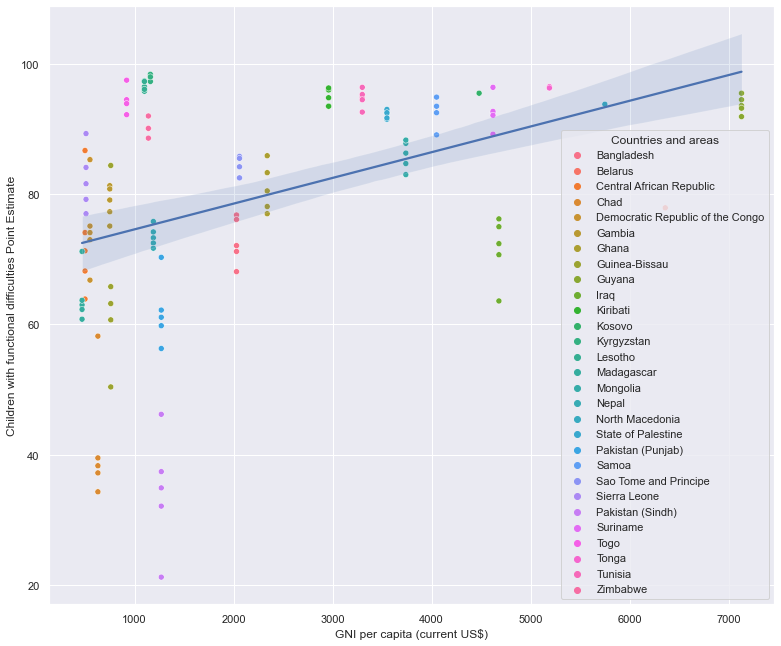

In [24]:
# scatterplot for children with functional difficulties point estimate
sns.set(rc = {'figure.figsize':(13,11)})
plot = sns.scatterplot(data = anarP1, x = "GNI per capita (current US$)", y = "Children with functional difficulties Point Estimate", hue = "Countries and areas")
sns.regplot(data = anarP1, x = "GNI per capita (current US$)", y = "Children with functional difficulties Point Estimate", scatter = False, ax = plot)
plt.show()

In [25]:
# dataframe for children without functional difficulties point estimate
anarP2 = anarPrimary.copy()
anarP2 = anarP2[anarP2['Children without functional difficulties Point Estimate'].notna()]
anarP2 = anarP2[anarP2["Development regions"].str.contains("Not Classified") == False]
anarP2 = anarP2[["Countries and areas","Development regions","Children without functional difficulties Point Estimate","GNI per capita (current US$)"]]
anarP2

,Countries and areas,Development regions,Children without functional difficulties Point Estimate,GNI per capita (current US$)
1,Bangladesh,Least Developed,83.7,2030.0
2,Bangladesh,Least Developed,81.4,2030.0
3,Bangladesh,Least Developed,86.0,2030.0
4,Bangladesh,Least Developed,84.9,2030.0
5,Bangladesh,Least Developed,83.3,2030.0
...,...,...,...,...
156,Zimbabwe,Less Developed,90.3,1140.0
157,Zimbabwe,Less Developed,89.2,1140.0
158,Zimbabwe,Less Developed,91.4,1140.0
159,Zimbabwe,Less Developed,93.0,1140.0


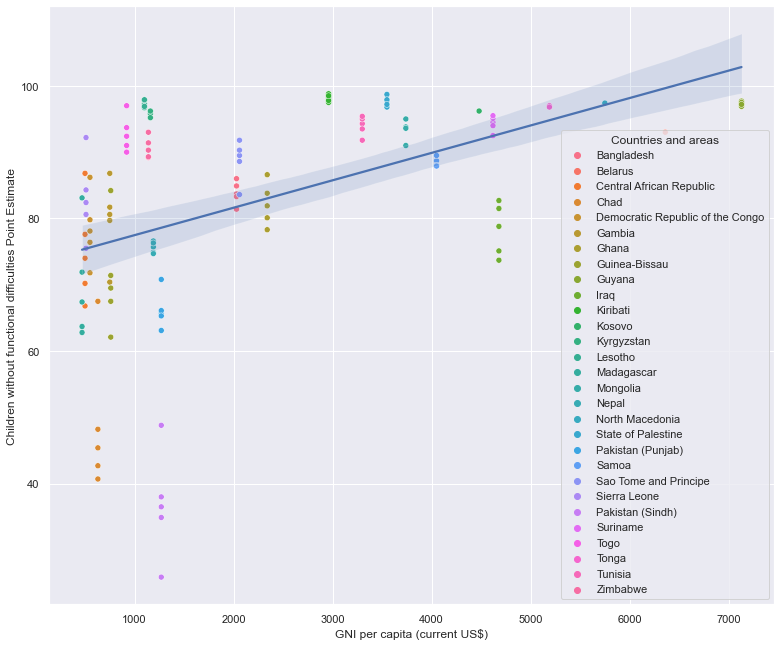

In [26]:
# scatterplot for children without functional difficulties point estimate
sns.set(rc = {'figure.figsize':(13,11)})
plot = sns.scatterplot(data = anarP2, x = "GNI per capita (current US$)", y = "Children without functional difficulties Point Estimate", hue = "Countries and areas")
sns.regplot(data = anarP2, x = "GNI per capita (current US$)", y = "Children without functional difficulties Point Estimate", scatter = False, ax = plot)
plt.show()

## Question 4
## Predictive Question<br>
Will a country with a more developed region have a higher total point estimate for children with functional difficulties in primary education level completion? 



In [27]:
completeP = completePrimary.copy()
completeP.columns

Index(['Countries and areas', 'ISO Code', 'Region', 'Sub-region',
       'Development regions', 'Indicator', 'Category', 'Total', 'Unnamed: 8',
       'Unnamed: 9', 'Children without functional difficulties', 'Unnamed: 11',
       'Unnamed: 12', 'Children with functional difficulties', 'Unnamed: 14',
       'Unnamed: 15', 'Data source', 'Time period',
       'GNI per capita (current US$)'],
      dtype='object')

In [28]:
cleanFile(completeP)

In [29]:
# drop the categories like Male, Female, Urban and Rural
completeP = completeP[completeP['Category'].str.contains("Male") == False]
completeP = completeP[completeP['Category'].str.contains("Female") == False]
completeP = completeP[completeP['Category'].str.contains("Urban") == False]
completeP = completeP[completeP['Category'].str.contains("Rural") == False]
print(completeP.columns)

completeP = completeP[completeP["Children with functional difficulties Point Estimate"].notna()]
#completeP = completeP[["Development regions", "Total Point Estimate"]]
#completeP = completeP.groupby('Countries and areas')['Children with functional difficulties Point Estimate'].max().reset_index(name = 'Children with functional difficulties Point Estimate').sort_values('Children with functional difficulties Point Estimate', ascending = False)
completeP

Index(['Countries and areas', 'ISO Code', 'Region', 'Sub-region',
       'Development regions', 'Indicator', 'Category', 'Total Point Estimate',
       'Children without functional difficulties Point Estimate',
       'Children with functional difficulties Point Estimate', 'Data source',
       'Time period', 'GNI per capita (current US$)'],
      dtype='object')


,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total Point Estimate,Children without functional difficulties Point Estimate,Children with functional difficulties Point Estimate,Data source,Time period,GNI per capita (current US$)
1,Bangladesh,BGD,SA,SA,Least Developed,Completion rate primary,Total,85.1,86.2,70.7,MICS6,2019,2030.0
11,Central African Republic,CAF,SSA,WCA,Least Developed,Completion rate primary,Total,27.1,30.6,18.8,MICS6,2018-2019,500.0
16,Chad,TCD,SSA,WCA,Least Developed,Completion rate primary,Total,27,27.8,24.7,MICS6,2019,630.0
21,Democratic Republic of the Congo,COD,SSA,WCA,Least Developed,Completion rate primary,Total,65,66.3,58.5,MICS6,2017-2018,550.0
31,Ghana,GHA,SSA,WCA,Less Developed,Completion rate primary,Total,72.1,72.7,70,MICS6,2017-2018,2340.0
36,Guinea-Bissau,GNB,SSA,WCA,Least Developed,Completion rate primary,Total,25.2,25.9,21,MICS6,2018-2019,760.0
41,Guyana,GUY,LAC,LAC,Less Developed,Completion rate primary,Total,98.1,98.3,97.3,MICS6,2019-2020,7130.0
46,Iraq,IRQ,MENA,MENA,Less Developed,Completion rate primary,Total,75.2,78.6,61.7,MICS6,2018,4680.0
51,Kiribati,KIR,EAP,EAP,Least Developed,Completion rate primary,Total,95.3,97,87.2,MICS6,2018-2019,2960.0
56,Kosovo,XKX,ECA,EECA,Less Developed,Completion rate primary,Total,99,99.2,97.1,MICS6,2019-20,4480.0


In [30]:
# preparation of data for model training
incomplete_rows = completePrimary[completePrimary.isnull().any(axis = 1)]
incomplete_rows

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total,Unnamed: 8,Unnamed: 9,Children without functional difficulties,Unnamed: 11,Unnamed: 12,Children with functional difficulties,Unnamed: 14,Unnamed: 15,Data source,Time period,GNI per capita (current US$)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Point estimate,Upper limit,Lower limit,Point estimate,Upper limit,Lower limit,Point estimate,Upper limit,Lower limit,NaN,NaN,NaN
6,Belarus,BLR,ECA,EECA,More Developed,Completion rate primary,Total,100,100,100,100,100,100,NaN,NaN,NaN,MICS6,2019,6360.0
7,Belarus,BLR,ECA,EECA,More Developed,Completion rate primary,Male,100,100,100,100,100,100,NaN,NaN,NaN,MICS6,2019,6360.0
8,Belarus,BLR,ECA,EECA,More Developed,Completion rate primary,Female,100,100,100,100,100,100,NaN,NaN,NaN,MICS6,2019,6360.0
9,Belarus,BLR,ECA,EECA,More Developed,Completion rate primary,Urban,100,100,100,100,100,100,NaN,NaN,NaN,MICS6,2019,6360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Tuvalu,TUV,EAP,EAP,Least Developed,Completion rate primary,Male,100,100,100,NaN,NaN,NaN,NaN,NaN,NaN,MICS6,2019-2020,5820.0
153,Tuvalu,TUV,EAP,EAP,Least Developed,Completion rate primary,Female,100,100,100,NaN,NaN,NaN,NaN,NaN,NaN,MICS6,2019-2020,5820.0
154,Tuvalu,TUV,EAP,EAP,Least Developed,Completion rate primary,Urban,100,100,100,NaN,NaN,NaN,NaN,NaN,NaN,MICS6,2019-2020,5820.0
155,Tuvalu,TUV,EAP,EAP,Least Developed,Completion rate primary,Rural,100,100,100,NaN,NaN,NaN,NaN,NaN,NaN,MICS6,2019-2020,5820.0


In [31]:
# remove those NaN rows
cleaning = completeP.dropna(subset=['Children with functional difficulties Point Estimate','Children without functional difficulties Point Estimate'], axis = 0)
cleaning = cleaning[cleaning["Development regions"].str.contains("Not Classified") == False]
cleaning.reset_index(drop=True)

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total Point Estimate,Children without functional difficulties Point Estimate,Children with functional difficulties Point Estimate,Data source,Time period,GNI per capita (current US$)
0,Bangladesh,BGD,SA,SA,Least Developed,Completion rate primary,Total,85.1,86.2,70.7,MICS6,2019,2030.0
1,Central African Republic,CAF,SSA,WCA,Least Developed,Completion rate primary,Total,27.1,30.6,18.8,MICS6,2018-2019,500.0
2,Chad,TCD,SSA,WCA,Least Developed,Completion rate primary,Total,27,27.8,24.7,MICS6,2019,630.0
3,Democratic Republic of the Congo,COD,SSA,WCA,Least Developed,Completion rate primary,Total,65,66.3,58.5,MICS6,2017-2018,550.0
4,Ghana,GHA,SSA,WCA,Less Developed,Completion rate primary,Total,72.1,72.7,70,MICS6,2017-2018,2340.0
5,Guinea-Bissau,GNB,SSA,WCA,Least Developed,Completion rate primary,Total,25.2,25.9,21,MICS6,2018-2019,760.0
6,Guyana,GUY,LAC,LAC,Less Developed,Completion rate primary,Total,98.1,98.3,97.3,MICS6,2019-2020,7130.0
7,Iraq,IRQ,MENA,MENA,Less Developed,Completion rate primary,Total,75.2,78.6,61.7,MICS6,2018,4680.0
8,Kiribati,KIR,EAP,EAP,Least Developed,Completion rate primary,Total,95.3,97,87.2,MICS6,2018-2019,2960.0
9,Kosovo,XKX,ECA,EECA,Less Developed,Completion rate primary,Total,99,99.2,97.1,MICS6,2019-20,4480.0


In [32]:
cleaning = cleaning[cleaning['Category'].str.contains("Male") == False]
cleaning = cleaning[cleaning['Category'].str.contains("Female") == False]
cleaning = cleaning[cleaning['Category'].str.contains("Urban") == False]
cleaning = cleaning[cleaning['Category'].str.contains("Rural") == False]
cleaning = cleaning[["Development regions", "Children with functional difficulties Point Estimate"]]

In [33]:
# check the number of rows after we remove the NaNs
len(cleaning)

24

In [34]:
#convert categorical column Developing regions to numerical variable using label encoder
encoder = LabelEncoder()
cleaning_cat = cleaning["Development regions"].values
cleaning_cat_encoded = encoder.fit_transform(cleaning_cat.astype('str'))   # this "fits" the labels to numerical classes
cleaning_cat_encoded

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [35]:
encoder.classes_

array(['Least Developed', 'Less Developed'], dtype='<U15')

In [36]:
cleaning["Development regions"] = encoder.fit_transform(cleaning["Development regions"])

In [37]:
X = cleaning.drop("Children with functional difficulties Point Estimate", axis = 1)
y = cleaning["Children with functional difficulties Point Estimate"].copy()

In [38]:
# check the shape to know that the information is correct
print(X.shape)
print(y.shape)

(24, 1)
(24,)


In [39]:
#train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [40]:
# check shapes after splitting
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18, 1)
(18,)
(6, 1)
(6,)


In [41]:
# fit data into a linear regression model
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [42]:
print("Coefficient :" + str(model.coef_))
print("Intercept :" + str(model.intercept_))

Coefficient :[18.03333333]
Intercept :62.144444444444446


 $\text{R}^2$ determination coefficient

In [43]:
print("Determination coefficient: " + str(model.score(X_test, y_test)))

Determination coefficient: 0.1845576508882365


In [44]:
# take first 5 entries from X_test
data = X_test.iloc[:5]
predictedPointEstimate = model.predict(data)
print("Predicted Total Point Estimate: ")
print(predictedPointEstimate)

Predicted Total Point Estimate: 
[80.17777778 80.17777778 62.14444444 62.14444444 80.17777778]


In [45]:
# actual 5 entries from y_test
actualPointEstimate = y_test.iloc[:5].values
print("Actual Total Point Estimate: ")
print(actualPointEstimate)

Actual Total Point Estimate: 
[70 97.1 21 58.5 61.7]


In [46]:
np.abs(predictedPointEstimate-actualPointEstimate)

array([10.177777777777777, 16.922222222222217, 41.144444444444446,
       3.6444444444444457, 18.477777777777774], dtype=object)

In [47]:
y_pred = model.predict(X_test)
modelMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Erorr (MAE): ")
print(modelMae)

Mean Absolute Erorr (MAE): 
15.120370370370368


## Question 5
## Causal Question<br>
Does a change in the development of a region reduce the point estimate of children with functional difficulties in terms of primary education level completion?



In [48]:
comP = completePrimary.copy()
cleanFile(comP)

In [49]:
comP = comP.astype({'Total Point Estimate':'float','Children without functional difficulties Point Estimate':'float',
               'Children with functional difficulties Point Estimate':'float'})
comP.columns

Index(['Countries and areas', 'ISO Code', 'Region', 'Sub-region',
       'Development regions', 'Indicator', 'Category', 'Total Point Estimate',
       'Children without functional difficulties Point Estimate',
       'Children with functional difficulties Point Estimate', 'Data source',
       'Time period', 'GNI per capita (current US$)'],
      dtype='object')

In [50]:
comP = comP[comP['Category'].str.contains('Male') == False]
comP = comP[comP['Category'].str.contains('Female') == False]
comP = comP[comP['Category'].str.contains('Urban') == False]
comP = comP[comP['Category'].str.contains('Rural') == False]
comP.head()

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total Point Estimate,Children without functional difficulties Point Estimate,Children with functional difficulties Point Estimate,Data source,Time period,GNI per capita (current US$)
1,Bangladesh,BGD,SA,SA,Least Developed,Completion rate primary,Total,85.1,86.2,70.7,MICS6,2019,2030.0
6,Belarus,BLR,ECA,EECA,More Developed,Completion rate primary,Total,100.0,100.0,NaN,MICS6,2019,6360.0
11,Central African Republic,CAF,SSA,WCA,Least Developed,Completion rate primary,Total,27.1,30.6,18.8,MICS6,2018-2019,500.0
16,Chad,TCD,SSA,WCA,Least Developed,Completion rate primary,Total,27.0,27.8,24.7,MICS6,2019,630.0
21,Democratic Republic of the Congo,COD,SSA,WCA,Least Developed,Completion rate primary,Total,65.0,66.3,58.5,MICS6,2017-2018,550.0


In [51]:
# dataframe for total point estimate
comP2 = comP.copy()
comP2 = comP2[comP2["Total Point Estimate"].notna()]
comP2 = comP2[comP2["Development regions"].str.contains("Not Classified") == False]
comP2 = comP2[["Countries and areas","Development regions","Total Point Estimate"]]
comP2.head()

,Countries and areas,Development regions,Total Point Estimate
1,Bangladesh,Least Developed,85.1
6,Belarus,More Developed,100.0
11,Central African Republic,Least Developed,27.1
16,Chad,Least Developed,27.0
21,Democratic Republic of the Congo,Least Developed,65.0


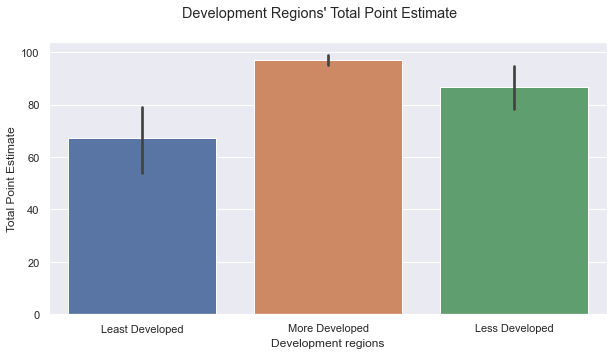

In [52]:
figure(figsize=(10,5))
ax = sns.barplot(x="Development regions", y="Total Point Estimate", data=comP2)
ax.figure.suptitle("Development Regions' Total Point Estimate")
plt.show()

## Question 6
## Mechanistic Question<br>
How does a more developed region lead to an increased total point estimate in terms of primary education level completion?



#so we are going to use a supplementary material that we have found online which is the GNI PER CAPITA. We will take a look if a more devloped region leads to an increase in point estimate of children.

In [53]:
cp = completePrimary.copy()

In [54]:
cleanFile(cp)

In [55]:
cp = cp.astype({'Total Point Estimate':'float','Children without functional difficulties Point Estimate':'float',
    'Children with functional difficulties Point Estimate': 'float'})
cp.columns

Index(['Countries and areas', 'ISO Code', 'Region', 'Sub-region',
       'Development regions', 'Indicator', 'Category', 'Total Point Estimate',
       'Children without functional difficulties Point Estimate',
       'Children with functional difficulties Point Estimate', 'Data source',
       'Time period', 'GNI per capita (current US$)'],
      dtype='object')

In [56]:
cp = cp[cp['Category'].str.contains("Male") == False]
cp = cp[cp['Category'].str.contains("Female") == False]
cp = cp[cp['Category'].str.contains("Urban") == False]
cp = cp[cp['Category'].str.contains("Rural") == False]
cp.head()

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total Point Estimate,Children without functional difficulties Point Estimate,Children with functional difficulties Point Estimate,Data source,Time period,GNI per capita (current US$)
1,Bangladesh,BGD,SA,SA,Least Developed,Completion rate primary,Total,85.1,86.2,70.7,MICS6,2019,2030.0
6,Belarus,BLR,ECA,EECA,More Developed,Completion rate primary,Total,100.0,100.0,NaN,MICS6,2019,6360.0
11,Central African Republic,CAF,SSA,WCA,Least Developed,Completion rate primary,Total,27.1,30.6,18.8,MICS6,2018-2019,500.0
16,Chad,TCD,SSA,WCA,Least Developed,Completion rate primary,Total,27.0,27.8,24.7,MICS6,2019,630.0
21,Democratic Republic of the Congo,COD,SSA,WCA,Least Developed,Completion rate primary,Total,65.0,66.3,58.5,MICS6,2017-2018,550.0


In [57]:
cp1 = cp.copy()
cp1 = cp1[cp1["Total Point Estimate"].notna()]
cp1 = cp1[cp1["Development regions"].str.contains("Not Classified") == False]
cp1 = cp1[["Countries and areas","Development regions","Total Point Estimate", "GNI per capita (current US$)"]]
cp1.head()

,Countries and areas,Development regions,Total Point Estimate,GNI per capita (current US$)
1,Bangladesh,Least Developed,85.1,2030.0
6,Belarus,More Developed,100.0,6360.0
11,Central African Republic,Least Developed,27.1,500.0
16,Chad,Least Developed,27.0,630.0
21,Democratic Republic of the Congo,Least Developed,65.0,550.0


In [58]:
cp1["Development regions"].head()

1     Least Developed
6      More Developed
11    Least Developed
16    Least Developed
21    Least Developed
Name: Development regions, dtype: object

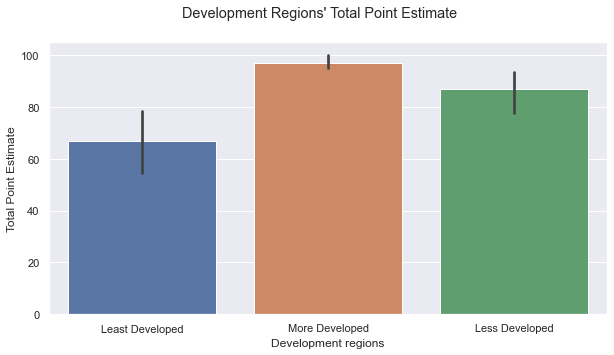

In [59]:
figure(figsize=(10,5))
ax = sns.barplot(x="Development regions", y="Total Point Estimate", data=cp1 )
ax.figure.suptitle("Development Regions' Total Point Estimate")
#plt.savefig("q6_1")
plt.show()

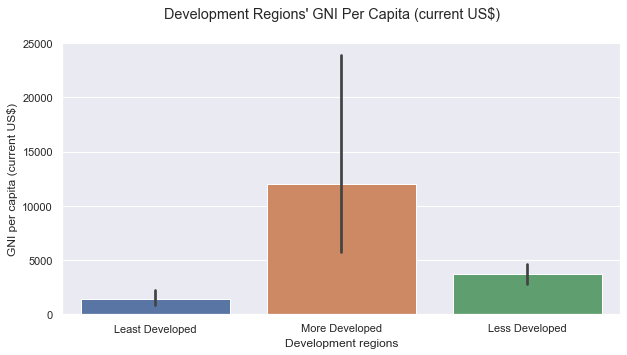

In [60]:
figure(figsize=(10,5))
ax = sns.barplot(x="Development regions", y="GNI per capita (current US$)", data=cp1)
ax.figure.suptitle("Development Regions' GNI Per Capita (current US$)")
#plt.savefig("q6_2")
plt.show()

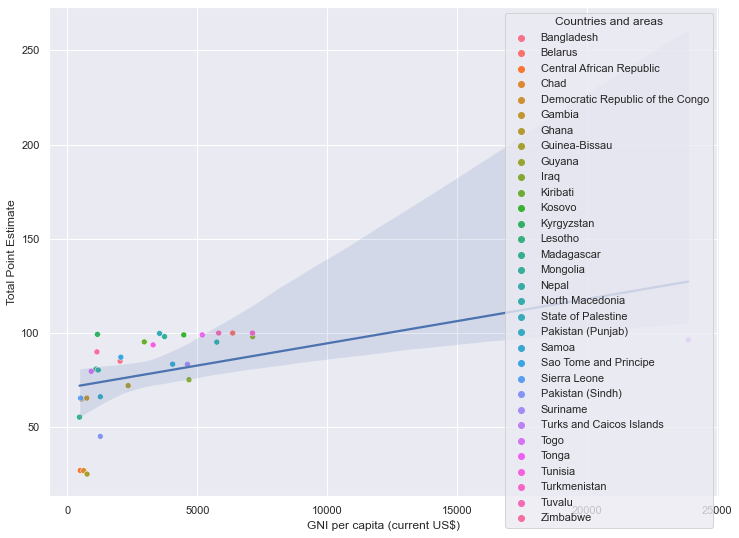

In [61]:
sns.set(rc={'figure.figsize':(12,9)})
plot = sns.scatterplot(data=cp1,x = "GNI per capita (current US$)", y = "Total Point Estimate", hue = "Countries and areas")
sns.regplot(data=cp1, x = "GNI per capita (current US$)", y = "Total Point Estimate", scatter= False, ax = plot)
#plt.savefig("q6_3")
plt.show()

As the GNI per capita (US$) increases, we can see that the point estimate for children with functional difficulties also increases, which indicates that a positive correlation exists between the two variables. Also, we can see that the regression line between the two variables is a diagonal line, which means that the correlation between these two attributes is quite moderate. Hence, we can say that a country with a higher GNI per capita is associated with the total point estimate in terms of primary level education completion.


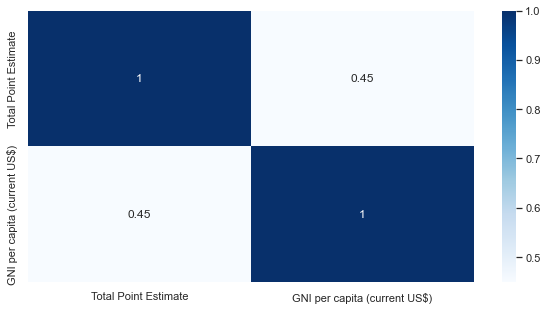

In [62]:
figure(figsize=(10,5))
sns.heatmap(cp1.corr(), cmap='Blues', annot= True)
#plt.savefig("q6_4")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a41bf578-6ba4-412d-9fde-70237d38d7a8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>